In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import savReaderWriter
from random import choice
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline
datasets = []

In [ ]:
# Quick import of cleaned/imputed data
complete_df = pd.read_csv('data/complete_df.csv')

In [2]:
# Import each dataset 

def import_data():
    
        with savReaderWriter.SavReader('data/N8Final/n8.sav') as reader:
            N8 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])

        N8.columns=N8.columns.str.replace("'", '')
        N8.columns=N8.columns.str[1:]
        datasets.append([N8, 'N8'])


        with savReaderWriter.SavReader('data/N9/N9.SAV') as reader:
            N9 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])


        N9.columns=N9.columns.str.replace("'", '')
        N9.columns=N9.columns.str[1:]
        datasets.append([N9, 'N9'])


        with savReaderWriter.SavReader('data/N10/n10.sav') as reader:
            N10 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])

        N10.columns=N10.columns.str.replace("'", '')
        N10.columns=N10.columns.str[1:]
        datasets.append([N10, 'N10'])


        with savReaderWriter.SavReader('data/N11/n11.sav') as reader:
            N11 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])

        N11.columns=N11.columns.str.replace("'", '')
        N11.columns=N11.columns.str[1:]
        datasets.append([N11, 'N11'])


        with savReaderWriter.SavReader('data/N12/n12.sav') as reader:
            N12 = pd.DataFrame(reader.all(), columns = [str(s) for s in reader.header])

        N12.columns=N12.columns.str.replace("'", '')
        N12.columns=N12.columns.str[1:]
        datasets.append([N12, 'N12'])

        return N8, N9, N10, N11, N12

In [3]:
N8, N9, N10, N11, N12 = import_data()

In [175]:
#create dictionaries for columns which have consistent values across all datasets
ethnicity_dict = {1:'Asian', 2:'Black', 3:'Black/Hispanic', 4:'White', 5:'White/Hispanic', 6:'American Indain', 
                  7:'Pacific Islander', 9:'Mixed', 10:'Mixed', 11:'Native American', 18:'Hispanic'}

age_dict = {1:19, 2:22, 3:27, 4:32, 5:37, 6:42, 7:47, 8:52, 9:57, 10:62, 11:67, 
            12:72, 13:int(np.random.normal(80, 2.5, 1))}

work_dict = {1:'Full Time', 2:'Part Time', 3:'Temporary Leave', 4:'Unemployed', 5:'Unemployed', 6:'Student', 
             7:'Retired', 8:'Homemaker', 9:'Disabled', 10:'Never Worked', 11:'Self Employed', 12:'Volunteer Work'}

#functions to clean and return each individual dataset formatted in exactly the same way
#with the exact same columns
def clean_N12(N12):
    state_dict_N12 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 3:'American Somoa', 4:'Arizona', 5:'Arkansas', 6:'California', 7:'Colorado', 8:'Connecticut', 9:'Deleware', 10:'District of Columbia', 11:'Florida', 12:'Georgia', 13:'Guam', 14:'Hawaii', 15:'Idaho', 16:'Illinois', 17:'Indiana', 18:'Iowa', 19:'Kansas', 20:'Kentucky', 21:'Louisiana', 22:'Maine', 23:'Maryland', 24:'Massachusetts', 25:'Michigan', 26:'Minnesota', 27:'Mississippi', 28:'Missouri', 29:'Montana', 30:'Nebraska', 31:'Nevada', 32:'New Hampshire', 33:'New Jersey', 34:'New Mexico', 35:'New York', 36:'North Carolina', 37:'North Dakota', 38:'Northern Mariana Islands', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 43:'Peurto Rico', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virginia', 52:'Virgin Islands', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 95:'Unknown', 97:'Unknown', 99:'Unknown'}
    cleaned_N12 = N12[['a1', 'age1', 'mqa2', 'a4', 'a12', 'a17', 'a18c', 'b1c', 'b2c', 'b3c', 'b4c', 'b5', 
                       'n1', 'i3', 'i5', 'i6', 'b31', 'a15']]
    
    cleaned_N12.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work_Situation', 
                           'Household_Income', 'Wine_Frequency', 'Beer_Frequency', 'Liquor_Frequency', 
                           'Average_Drinking', 'Current_Drinker', 'Been_Arrested', 'Importance_Friends_Family', 
                           'Importance_Religion', 'Importance_Alcoholic', 'Age_Started', 'Religious_Life']
    
    cleaned_N12.insert(loc=0, column='Dataset', value='N12')
    cleaned_N12.loc[:,'State'] = cleaned_N12['State'].map(lambda x:state_dict_N12[x])
    cleaned_N12.loc[:,'Gender'] = cleaned_N12['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N12.loc[:,'Ethnicity'] = cleaned_N12['Ethnicity'].map(lambda x: ethnicity_dict[x] 
                                                                  if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N12.loc[:,'Age'] = cleaned_N12['Age'].map(lambda x:age_dict[x] if x in age_dict.keys() else 'Unknown')
    cleaned_N12.loc[:,'Work_Situation'] = cleaned_N12['Work_Situation'].map(lambda x:work_dict[x]
                                                                            if x in work_dict.keys() else 'Unknown')
    return cleaned_N12

def clean_N11(N11):
    state_dict_N11 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 3:'American Somoa', 4:'Arizona', 5:'Arkansas', 6:'California', 7:'Colorado', 8:'Connecticut', 9:'Deleware', 10:'District of Columbia', 11:'Florida', 12:'Georgia', 13:'Guam', 14:'Hawaii', 15:'Idaho', 16:'Illinois', 17:'Indiana', 18:'Iowa', 19:'Kansas', 20:'Kentucky', 21:'Louisiana', 22:'Maine', 23:'Maryland', 24:'Massachusetts', 25:'Michigan', 26:'Minnesota', 27:'Mississippi', 28:'Missouri', 29:'Montana', 30:'Nebraska', 31:'Nevada', 32:'New Hampshire', 33:'New Jersey', 34:'New Mexico', 35:'New York', 36:'North Carolina', 37:'North Dakota', 38:'Northern Mariana Islands', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 43:'Peurto Rico', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virgin Islands', 52:'Virginia', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 95:'Unknown', 97:'Unknown', 99:'Unknown'}
    cleaned_N11 = N11[['qa1', 'age1', 'mqa2', 'qa4', 'qa12', 'qa17', 'qa18', 'qb1', 'qb2', 'qb3', 'qb4', 'qb5', 
                       'qn1', 'qi3', 'qi5', 'qi6', 'qb31', 'qa15']]
    
    cleaned_N11.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work_Situation', 
                           'Household_Income', 'Wine_Frequency', 'Beer_Frequency', 'Liquor_Frequency', 
                           'Average_Drinking', 'Current_Drinker', 'Been_Arrested', 'Importance_Friends_Family', 
                           'Importance_Religion', 'Importance_Alcoholic', 'Age_Started', 'Religious_Life']
    
    cleaned_N11.insert(loc=0, column='Dataset', value='N11')
    cleaned_N11.loc[:,'State'] = cleaned_N11['State'].map(lambda x:state_dict_N11[x] 
                                                          if x in state_dict_N11.keys() else 'Unknown')
    cleaned_N11.loc[:,'Gender'] = cleaned_N11['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N11.loc[:,'Ethnicity'] = cleaned_N11['Ethnicity'].map(lambda x: ethnicity_dict[x] 
                                                                  if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N11.loc[:,'Age'] = cleaned_N11['Age'].map(lambda x: age_dict[x] if x in age_dict.keys() else 'Unknown')
    cleaned_N11.loc[:,'Work_Situation'] = cleaned_N11['Work_Situation'].map(lambda x:work_dict[x] 
                                                                            if x in work_dict.keys() else 'Unknown')
    return cleaned_N11

def clean_N10(N10):
    state_dict_N10 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 4:'Arizona', 5:'Arkansas', 6:'California', 8:'Colorado', 9:'Connecticut', 10:'Deleware', 11:'District of Columbia', 12:'Florida', 13:'Georgia', 15:'Hawaii', 16:'Idaho', 17:'Illinois', 18:'Indiana', 19:'Iowa', 20:'Kansas', 21:'Kentucky', 22:'Louisiana', 23:'Maine', 24:'Maryland', 25:'Massachusetts', 26:'Michigan', 27:'Minnesota', 28:'Mississippi', 29:'Missouri', 30:'Montana', 31:'Nebraska', 32:'Nevada', 33:'New Hampshire', 34:'New Jersey', 35:'New Mexico', 36:'New York', 37:'North Carolina', 38:'North Dakota', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virginia', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 99:'Unknown'}
    cleaned_N10 = N10[['a1', 'cage', 'a2a', 'a4', 'a12', 'a17', 'a18', 'b1', 'b2', 'b3', 'b4', 'b5', 'n1',
                       'i3', 'i5', 'i6', 'b31', 'a15']]
    
    cleaned_N10.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work_Situation', 
                           'Household_Income', 'Wine_Frequency', 'Beer_Frequency', 'Liquor_Frequency', 
                           'Average_Drinking', 'Current_Drinker', 'Been_Arrested', 'Importance_Friends_Family', 
                           'Importance_Religion', 'Importance_Alcoholic', 'Age_Started', 'Religious_Life']
    
    cleaned_N10.insert(loc=0, column='Dataset', value='N10')
    cleaned_N10.loc[:,'State'] = cleaned_N10['State'].map(lambda x:state_dict_N10[x] 
                                                          if x in state_dict_N10.keys() else 'Unknown')
    cleaned_N10.loc[:,'Gender'] = cleaned_N10['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N10.loc[:,'Ethnicity'] = cleaned_N10['Ethnicity'].map(lambda x: ethnicity_dict[x] 
                                                                  if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N10.loc[:,'Age'] = cleaned_N10['Age'].map(lambda x: 'Unknown' if x>90 else x)
    cleaned_N10.loc[:,'Work_Situation'] = cleaned_N10['Work_Situation'].map(lambda x:work_dict[x]
                                                                            if x in work_dict.keys() else 'Unknown')
    return cleaned_N10

def clean_N9(N9):
    state_dict_N9 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 4:'Arizona', 5:'Arkansas', 6:'California', 8:'Colorado', 9:'Connecticut', 10:'Deleware', 11:'District of Columbia', 12:'Florida', 13:'Georgia', 15:'Hawaii', 16:'Idaho', 17:'Illinois', 18:'Indiana', 19:'Iowa', 20:'Kansas', 21:'Kentucky', 22:'Louisiana', 23:'Maine', 24:'Maryland', 25:'Massachusetts', 26:'Michigan', 27:'Minnesota', 28:'Mississippi', 29:'Missouri', 30:'Montana', 31:'Nebraska', 32:'Nevada', 33:'New Hampshire', 34:'New Jersey', 35:'New Mexico', 36:'New York', 37:'North Carolina', 38:'North Dakota', 39:'Ohio', 40:'Oklahoma', 41:'Oregon', 42:'Pennsylvania', 44:'Rhode Island', 45:'South Carolina', 46:'South Dakota', 47:'Tennessee', 48:'Texas', 49:'Utah', 50:'Vermont', 51:'Virginia', 53:'Washington', 54:'West Virginia', 55:'Wisconsin', 56:'Wyoming', 99:'Unknown'}
    cleaned_N9 = N9[['q1', 'q3', 'q6', 'q9', 'q18', 'q23', 'q27', 'q35a', 'q35b', 'q35c', 'q35d', 'la', 
                     'q222', 'q167c', 'q167e', 'q167c', 'q55', 'q22']]
    
    cleaned_N9.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work_Situation', 
                          'Household_Income', 'Wine_Frequency', 'Beer_Frequency', 'Liquor_Frequency', 
                          'Average_Drinking', 'Current_Drinker', 'Been_Arrested', 'Importance_Friends_Family', 
                          'Importance_Religion', 'Importance_Alcoholic', 'Age_Started', 'Religious_Life']
    
    cleaned_N9.insert(loc=0, column='Dataset', value='N9')
    cleaned_N9.loc[:,'State'] = cleaned_N9['State'].map(lambda x:state_dict_N9[x] 
                                                        if x in state_dict_N9.keys() else 'Unknown')
    cleaned_N9.loc[:,'Gender'] = cleaned_N9['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N9.loc[:,'Ethnicity'] = cleaned_N9['Ethnicity'].map(lambda x: ethnicity_dict[x] 
                                                                if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N9.loc[:,'Age'] = cleaned_N9['Age'].map(lambda x: 'Unknown' if x>90 else x)
    cleaned_N9.loc[:,'Work_Situation'] = cleaned_N9['Work_Situation'].map(lambda x:work_dict[x] 
                                                                          if x in work_dict.keys() else 'Unknown')
    return cleaned_N9

def clean_N8(N8):
    state_dict_N8 = {-8: 'Unknown', 1: 'Alabama', 2: 'Alaska', 3:'Arizona', 4:'Arkansas', 5:'California', 6:'Colorado', 7:'Connecticut', 8:'Deleware', 9:'District of Columbia', 10:'Florida', 11:'Georgia', 12:'Hawaii', 13:'Idaho', 14:'Illinois', 15:'Indiana', 16:'Iowa', 17:'Kansas', 18:'Kentucky', 19:'Louisiana', 20:'Maine', 21:'Maryland', 22:'Massachusetts', 23:'Michigan', 24:'Minnesota', 25:'Mississippi', 26:'Missouri', 27:'Montana', 28:'Nebraska', 29:'Nevada', 30:'New Hampshire', 31:'New Jersey', 32:'New Mexico', 33:'New York', 34:'North Carolina', 35:'North Dakota', 36:'Ohio', 37:'Oklahoma', 38:'Oregon', 39:'Pennsylvania', 40:'Rhode Island', 41:'South Carolina', 42:'South Dakota', 43:'Tennessee', 44:'Texas', 45:'Utah', 46:'Vermont', 47:'Virginia', 48:'Washington', 49:'West Virginia', 51:'Wisconsin', 50:'Wyoming', 99:'Unknown'}
    cleaned_N8 = N8[['n8m135', 'n8m140', 'n8m152', 'n8m149', 'n8m158', 'n8m163', 'n8m171', 'n8m207', 
                     'n8m209', 'n8m211', 'n8m213', 'n8m133', 'n8m770', 'n8m460', 'n8m462', 'n8m463', 'n8m162']]
    
    cleaned_N8.columns = ['Gender', 'Age', 'State', 'Ethnicity', 'Education', 'Work_Situation', 
                          'Household_Income', 'Wine_Frequency', 'Beer_Frequency', 'Liquor_Frequency', 
                          'Average_Drinking', 'Current_Drinker', 'Been_Arrested', 'Importance_Friends_Family', 
                          'Importance_Religion', 'Importance_Alcoholic', 'Religious_Life']
    
    cleaned_N8.insert(loc=0, column='Dataset', value='N8')
    cleaned_N8.loc[:,'State'] = cleaned_N8['State'].map(lambda x:state_dict_N8[x] 
                                                        if x in state_dict_N8.keys() else 'Unknown')
    cleaned_N8.loc[:,'Gender'] = cleaned_N8['Gender'].map(lambda x:'M' if x == 1 else 'F')
    cleaned_N8.loc[:,'Ethnicity'] = cleaned_N8['Ethnicity'].map(lambda x: ethnicity_dict[x] 
                                                                if x in ethnicity_dict.keys() else 'Unknown')
    cleaned_N8.loc[:,'Age'] = cleaned_N8['Age'].map(lambda x: int(np.random.normal(80, 2.5, 1)) 
                                                    if 90-x > 74 else 90-x if x!=99 else 'Unknown')
    cleaned_N8.loc[:,'Work_Situation'] = cleaned_N8['Work_Situation'].map(lambda x:work_dict[x] 
                                                                          if x in work_dict.keys() else 'Unknown')
    return cleaned_N8

In [176]:
#call the clean functions and create a dataframe from each 
cleaned_N8 = clean_N8(N8)
cleaned_N9 = clean_N9(N9)
cleaned_N10 = clean_N10(N10)
cleaned_N11 = clean_N11(N11)
cleaned_N12 = clean_N12(N12)   

In [177]:
#Create a final dataframe by concatenating all of the cleaned dataframes
frames = [cleaned_N8, cleaned_N9, cleaned_N10, cleaned_N11, cleaned_N12]
final_df = pd.concat(frames, ignore_index=True)

/media/illuminator/Main/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [178]:
# Create features to flag imputed data before imputing 

final_df['is_null_Age_Started'] = final_df.Age_Started.isnull().astype(int)
final_df['is_null_Importance_Friends_Family'] = np.logical_not(final_df['Importance_Friends_Family'].between(1,4)).astype(int)
final_df['is_null_Importance_Alcoholic'] = np.logical_not(final_df['Importance_Alcoholic'].between(1,4)).astype(int)
final_df['is_null_Importance_Religion'] = np.logical_not(final_df['Importance_Religion'].between(1,4)).astype(int)

In [179]:
def impute_data(final_df):

        # Impute Been_Arrested values based on probability
        final_df['Been_Arrested'] = final_df['Been_Arrested'].map(lambda x: x 
                                                if x > 0 and x < 3 
                                                else np.random.choice(([1,2]), p=[0.1, .9])) 

        # Impute Age_Started values from normal distribution then cast to integer
        final_df['Age_Started'] = final_df['Age_Started'].map(lambda x: x 
                                                if x>5 and x<90 
                                                else int(np.random.normal(20, 2.5, 1)))

        # Impute income values with the mode for the few unknown values
        final_df['Household_Income'] = final_df['Household_Income'].map(lambda x: 7 
                                                 if x > 12 else x)

        # Impute income values with the mode for the few unknown values
        final_df['Education'] = final_df['Education'].map(lambda x: 12 
                                                if x > 30 else x)

        # Impute Age values which are unknown with normal distribution
        final_df['Age'] = final_df['Age'].map(lambda x: int(np.random.normal(48, 17, 1)) 
                                                if x == 'Unknown' else x)
        
        # Impute small percentage of drinking frequency features using probability
        num_range = [11,10,9,8,7,6,5,4]
        p = np.array([.46, .15, .16, .07, .05, .04, .04, .03])
        p /= np.sum(p)
        final_df['Liquor_Frequency'] = final_df['Liquor_Frequency'].map(lambda x: x 
                                                if x < 12 
                                                else np.random.choice((num_range), p=p))
        p = np.array([.45, .13, .11, .08, .08, .1, .03, .01, .01])
        p /= np.sum(p)
        final_df['Beer_Frequency'] = final_df['Beer_Frequency'].map(lambda x: x 
                                                 if x < 12 
                                                 else np.random.choice(([11,10,9,8,7,6,5,4,3]), p=p))
        p = np.array([.38, .16, .18, .08, .07, .07, .03, .03])
        p /= np.sum(p)
        final_df['Wine_Frequency'] = final_df['Wine_Frequency'].map(lambda x: x 
                                                if x < 12 
                                                else np.random.choice(([11,10,9,8,7,6,5,4]), p=p))
        
        # Impute small percentage of Unknown values in behavioral columns
        num_range = [4,3,2,1]
        p = np.array([.38, .13, .14, .35])
        p /= np.sum(p)
        final_df['Importance_Religion'] = final_df['Importance_Religion'].map(lambda x: x 
                                                if x > 0 and x < 5 
                                                else np.random.choice((num_range), p=p))
        p = np.array([.39, .12, .12, .37])
        p /= np.sum(p)
        final_df['Importance_Friends_Family'] = final_df['Importance_Friends_Family'].map(lambda x: x 
                                                if x > 0 and x < 5 
                                                else np.random.choice((num_range), p=p))
        p = np.array([.44, .13, .11, .32])
        p /= np.sum(p)
        final_df['Importance_Alcoholic'] = final_df['Importance_Alcoholic'].map(lambda x: x 
                                                if x > 0 and x < 5 
                                                else np.random.choice((num_range), p=p))
        p = np.array([.04, .07, .27, .62])
        p /= np.sum(p)
        final_df['Religious_Life'] = final_df['Religious_Life'].map(lambda x: x 
                                                if x > 0 and x < 5 
                                                else np.random.choice((num_range), p=p))
        
        return final_df

In [180]:
# Run imputing function
complete_df = impute_data(final_df)

In [181]:
# Drop Dataset and current drinking features for analysis
complete_df = complete_df.drop(columns=['Dataset', 'Current_Drinker'])

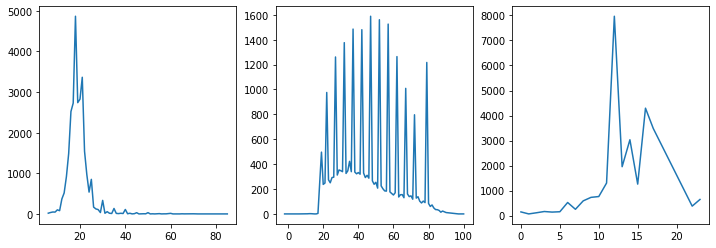

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.plot(complete_df.groupby('Age_Started')['Age_Started'].count())
ax2.plot(complete_df.groupby('Age')['Age'].count())
ax3.plot(complete_df.groupby('Education')['Education'].count())

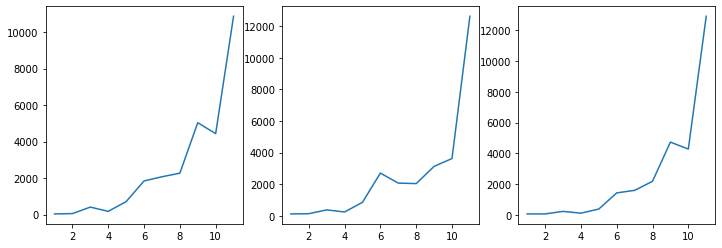

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.plot(final_df.groupby('Wine_Frequency')['Wine_Frequency'].count())
ax2.plot(final_df.groupby('Beer_Frequency')['Beer_Frequency'].count())
ax3.plot(final_df.groupby('Liquor_Frequency')['Liquor_Frequency'].count())

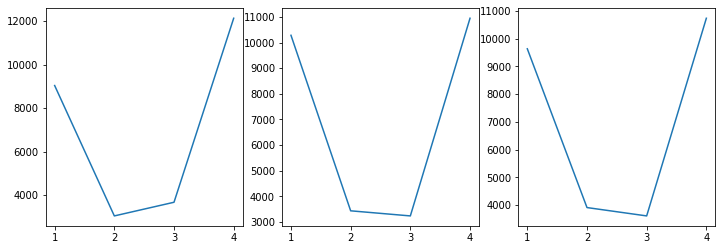

In [155]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.plot(final_df.groupby('Importance_Alcoholic')['Importance_Alcoholic'].count())
ax2.plot(final_df.groupby('Importance_Friends_Family')['Importance_Friends_Family'].count())
ax3.plot(final_df.groupby('Importance_Religion')['Importance_Religion'].count())

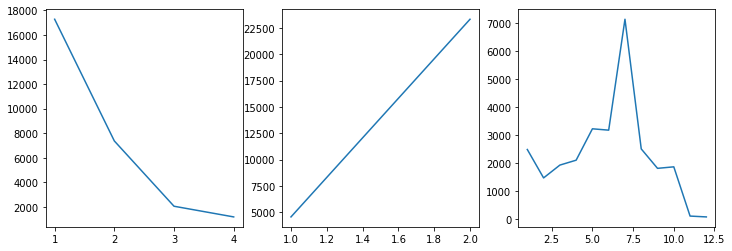

In [169]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.plot(final_df.groupby('Religios_Life')['Religios_Life'].count())
ax2.plot(final_df.groupby('Been_Arrested')['Been_Arrested'].count())
ax3.plot(final_df.groupby('Household_Income')['Household_Income'].count())

In [184]:
complete_df.mean()

Age                                  46.680844
Age_Started                          19.253046
Average_Drinking                      8.672710
Been_Arrested                         1.834169
Beer_Frequency                        9.210406
Education                            13.374158
Household_Income                      5.805253
Importance_Alcoholic                  2.678802
Importance_Friends_Family             2.532894
Importance_Religion                   2.551240
Liquor_Frequency                      9.583883
Religious_Life                        1.537552
Wine_Frequency                        9.266304
is_null_Age_Started                   0.073742
is_null_Importance_Friends_Family     0.035438
is_null_Importance_Alcoholic          0.227712
is_null_Importance_Religion           0.059589
dtype: float64

In [185]:
complete_df.std()

Age                                  17.390210
Age_Started                           4.647093
Average_Drinking                      5.809769
Been_Arrested                         0.371935
Beer_Frequency                        2.196174
Education                             3.579318
Household_Income                      2.559351
Importance_Alcoholic                  1.318392
Importance_Friends_Family             1.330810
Importance_Religion                   1.307680
Liquor_Frequency                      1.801094
Religious_Life                        0.805071
Wine_Frequency                        1.972386
is_null_Age_Started                   0.261356
is_null_Importance_Friends_Family     0.184887
is_null_Importance_Alcoholic          0.419364
is_null_Importance_Religion           0.236727
dtype: float64

In [186]:
# Dictionaies for assigning numeric values for clustering

ethnicity_dict = {'Asian':1, 'Black':2, 'Black/Hispanic':3, 'White':4, 'White/Hispanic':5, 
                  'American Indain':6, 'Pacific Islander':7, 'Mixed':8, 'Mixed':9, 'Native American':10, 
                  'Hispanic':11, 'Unknown': 12}
work_dict = {'Full Time':1, 'Part Time':2, 'Temporary Leave':3, 'Unemployed':4, 'Unemployed':5, 'Student':6, 
             'Retired':7, 'Homemaker':8, 'Disabled':9, 'Never Worked':10, 'Self Employed':11, 'Volunteer Work':12, 'Unknown': 13}

state_dict = {'Alabama':1, 'Alaska':2, 'American Somoa':3, 'Arizona':4, 'Arkansas':5,'California':6,'Colorado':7,
              'Connecticut':8,'Deleware':9, 'District of Columbia':10, 'Florida':11, 'Georgia':12, 'Guam':13, 
              'Hawaii':14, 'Idaho':15, 'Illinois':16, 'Indiana':17, 'Iowa':18, 'Kansas':19, 'Kentucky':20, 
              'Louisiana':21, 'Maine':67,'Maryland':22, 'Massachusetts':23, 'Michigan':24, 'Minnesota':25, 
              'Mississippi':26, 'Missouri':27, 'Montana':28, 'Nebraska':29, 'Nevada':30, 'New Hampshire':31,
              'New Jersey':32, 'New Mexico':33,'New York':34, 'North Carolina':35, 'North Dakota':36, 
              'Northern Mariana Islands':37, 'Ohio':38,'Oklahoma':39,'Oregon':40, 'Pennsylvania':51, 
              'Peurto Rico':52,'Rhode Island':53,'South Carolina':54,'South Dakota':55, 'Tennessee':56,
              'Texas':57,'Utah':58, 'Vermont':59, 'Virginia':60, 'Virgin Islands':61, 'Washington':62,
              'West Virginia':63, 'Wisconsin':64, 'Wyoming':65, 'Unknown':66}

gender_dict = {'F':0, 'M':1}

In [187]:
def make_clustering_df(col_name):
    
    cluster_df = complete_df[complete_df[col_name].between(1,4, inclusive=True)] # Only include rows with values 1-4
    test_df = cluster_df.drop(columns=col_name) # Drop label column for clustering
    
    #Convert all strings to numeric values for clustering
    test_df['Ethnicity'] = test_df['Ethnicity'].map(lambda x: ethnicity_dict[x])
    test_df['Work_Situation'] = test_df['Work_Situation'].map(lambda x: work_dict[x])
    test_df['Gender'] = test_df['Gender'].map(lambda x: gender_dict[x])
    test_df['State'] = test_df['State'].map(lambda x: state_dict[x])
    
    X_train, X_test, y_train, y_test = train_test_split(test_df, cluster_df[col_name], test_size=0.33, random_state=42)
    
    
    clf = RandomForestClassifier(max_depth=6, min_samples_split=5, n_jobs=-1)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    
    #clustering = KMeans(n_clusters=4).fit(test_df) 
    #clusters = clustering.labels_
    
    result_df = pd.concat([y_test, pd.DataFrame(predicted)], axis=1)
    print(result_df[col_name].corr(result_df[0]))
                           

RandomForestClassifier

In [188]:
make_clustering_df('Importance_Religion')
make_clustering_df('Importance_Alcoholic')
make_clustering_df('Importance_Friends_Family')

0.0033418121964859638
0.019876049210582575
-0.014181155797398004
